<a href="https://colab.research.google.com/github/BeommoKoo-dev/recommender-system/blob/beommo/wmd_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'
sentence_obama = sentence_obama.lower().split()
sentence_president = sentence_president.lower().split()

In [ ]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.

# Remove stopwords.
stop_words = stopwords.words('english')
sentence_obama = [w for w in sentence_obama if w not in stop_words]
sentence_president = [w for w in sentence_president if w not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# imports

import gensim
from gensim.models import KeyedVectors
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
# test for model.
model.most_similar('hi')

[('hello', 0.6548983454704285),
 ('hi_hi', 0.5714792609214783),
 ('Hi', 0.5667945742607117),
 ('Rahul_Goel_answers', 0.5513203740119934),
 ('aw', 0.5315303802490234),
 ('ya', 0.53110271692276),
 ('aww', 0.5240845680236816),
 ('jaldi', 0.5183888077735901),
 ('luv', 0.5159169435501099),
 ('deepak', 0.5092271566390991)]

In [ ]:
# ref : https://www.kaggle.com/code/yixuanzhou94/gensim-word-vector-visualization

def display_pca_scatterplot(model,words=None,sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()),sample)
        else:
            words = [word for word in model.vocab]

    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.show()

In [ ]:
model.save("word2vec.model")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

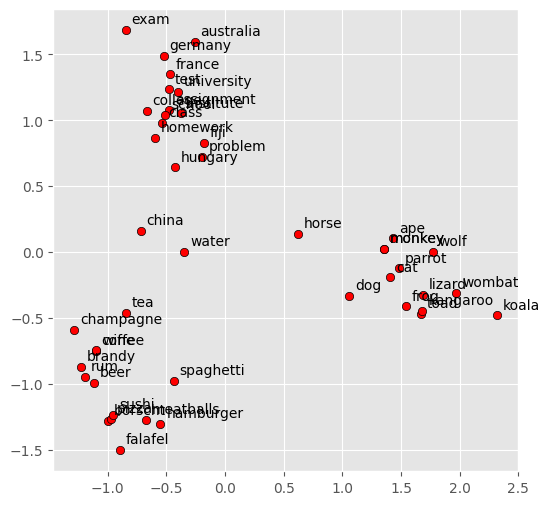

In [ ]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from gensim.models import LdaModel
from gensim import corpora
from sklearn.manifold import TSNE
# %matplotlib notebook # if in Jupyter for rotating and zooming

In [ ]:
!pip install POT

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
import numpy as np

distance = model.wmdistance(sentence_obama, sentence_president)
print('distance = %.4f' % distance)
model.most_similar('obama')

distance = 1.0175


[('mccain', 0.7319012880325317),
 ('hillary', 0.7284600138664246),
 ('obamas', 0.7229632139205933),
 ('george_bush', 0.7205674648284912),
 ('barack_obama', 0.7045838832855225),
 ('palin', 0.7043113708496094),
 ('clinton', 0.6934447884559631),
 ('clintons', 0.6816835403442383),
 ('sarah_palin', 0.6815143823623657),
 ('john_mccain', 0.6800707578659058)]